In [1]:
import pandas as pd
import json
import requests
import os
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button 

# Make sure to re-name BOTH of these so the correct file is read in, 
# and so the cleaned file doesn't over-write previous work
raw_data = "20000101_20230202.csv"
cleaned_data = "0002_cleaned_US_Drought_Monitor_Year.csv"

#csv_df = pd.read_csv(f"Resources/raw_csv/{cleaned_data}")
csv_df = pd.read_csv(f"Resources/raw_csv/{raw_data}")
Year_df = pd.read_csv(f"Resources/cleaned_csv/0002_cleaned_US_Drought_Monitor_Year.csv")

# Display sample data
#csv_df.head()

Year_df.head()

,Month,Day,Year,Drought Level,Population Current,Population Current %,Area Current,Area Current %,Area Miles
0,10,24,2000,D0,"2,380,148.06",6.39,"18,740.74",11.85,"158,147.87"
1,12,25,2001,D0,"2,219,580.49",5.96,"23,178.59",14.66,"158,147.87"
2,12,25,2001,D1,"626,656.08",1.68,"14,073.80",8.90,"158,147.87"
3,12,25,2001,D2,"285,274.20",0.77,"15,681.37",9.92,"158,147.87"
4,12,31,2002,D0,"9,292,089.20",24.94,"14,844.27",9.39,"158,147.87"


In [2]:
d = {'Map Month': csv_df['Month'],
     'Map Day': csv_df['Day'],
     'Map Year': csv_df['Year'],
     'Drought Level': csv_df['USDMLevel'],
     'USDMLevelID':csv_df['USDMLevelID'],
     'Population Current': csv_df['PopulationCurrent'],
     'Population Current %': csv_df['PopulationCurrentPercent'],
     'Area Current': csv_df['AreaCurrent'],
     'Area Current %': csv_df['AreaCurrentPercent'],
     'Area Miles': csv_df['AreaMiles'],
     }
    
cleaned_df = pd.DataFrame(data = d, index = None)
cleaned_df

,Map Month,Map Day,Map Year,Drought Level,USDMLevelID,Population Current,Population Current %,Area Current,Area Current %,Area Miles
0,1,4,2000,D0,1,"28,130,516.06",75.51,"76,187.59",48.17,"158,147.87"
1,1,11,2000,D0,1,"31,598,388.02",84.82,"129,289.05",81.75,"158,147.87"
2,1,18,2000,D0,1,"28,689,915.36",77.01,"113,921.84",72.04,"158,147.87"
3,1,25,2000,D0,1,"24,683,436.34",66.26,"88,511.14",55.97,"158,147.87"
4,2,1,2000,D0,1,"24,031,764.14",64.51,"80,468.74",50.88,"158,147.87"
...,...,...,...,...,...,...,...,...,...,...
3844,1,24,2023,D1,2,"28,521,258.43",76.56,"90,130.59",56.99,"158,147.87"
3845,1,24,2023,D2,3,"5,615,370.55",15.07,"51,509.75",32.57,"158,147.87"
3846,1,31,2023,D0,1,"3,090,885.86",8.30,"15,494.80",9.80,"158,147.87"
3847,1,31,2023,D1,2,"28,521,258.43",76.56,"90,130.59",56.99,"158,147.87"


In [3]:
#Dataset for 
e = {'Map Month': Year_df['Month'],
     'Map Day': Year_df['Day'],
     'Map Year': Year_df['Year'],
     'Drought Level': Year_df['Drought Level'],
     'Population Current': Year_df['Population Current'],
     'Population Current %': Year_df['Population Current %'],
     'Area Current': Year_df['Area Current'],
     'Area Current %': Year_df['Area Current %'],
     'Area Miles': Year_df['Area Miles'],
     }
    
Year_cleaned_df = pd.DataFrame(data = e, index = None)
Year_cleaned_df

,Map Month,Map Day,Map Year,Drought Level,Population Current,Population Current %,Area Current,Area Current %,Area Miles
0,10,24,2000,D0,"2,380,148.06",6.39,"18,740.74",11.85,"158,147.87"
1,12,25,2001,D0,"2,219,580.49",5.96,"23,178.59",14.66,"158,147.87"
2,12,25,2001,D1,"626,656.08",1.68,"14,073.80",8.90,"158,147.87"
3,12,25,2001,D2,"285,274.20",0.77,"15,681.37",9.92,"158,147.87"
4,12,31,2002,D0,"9,292,089.20",24.94,"14,844.27",9.39,"158,147.87"
...,...,...,...,...,...,...,...,...,...
73,12,27,2022,D3,"8,137,820.25",21.84,"44,805.63",28.33,"158,147.87"
74,12,27,2022,D4,"1,244,811.09",3.34,"11,329.51",7.16,"158,147.87"
75,1,31,2023,D0,"3,090,885.86",8.30,"15,494.80",9.80,"158,147.87"
76,1,31,2023,D1,"28,521,258.43",76.56,"90,130.59",56.99,"158,147.87"


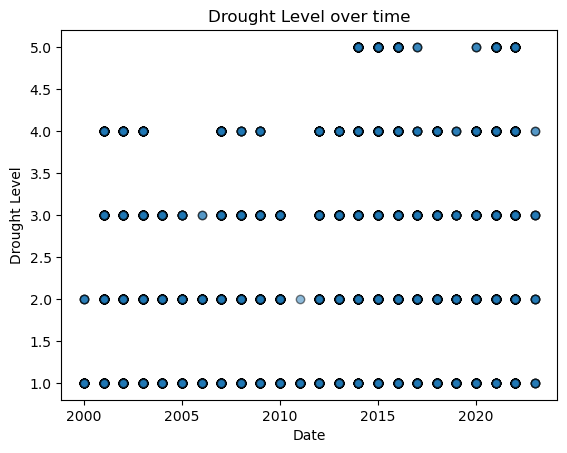

In [4]:
#Scatter plot of Drought level over time 

x_values = cleaned_df["Map Year"]
y_values = cleaned_df["USDMLevelID"]

plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.5)

plt.title("Drought Level over time")
plt.xlabel("Date")
plt.ylabel("Drought Level")

plt.show()

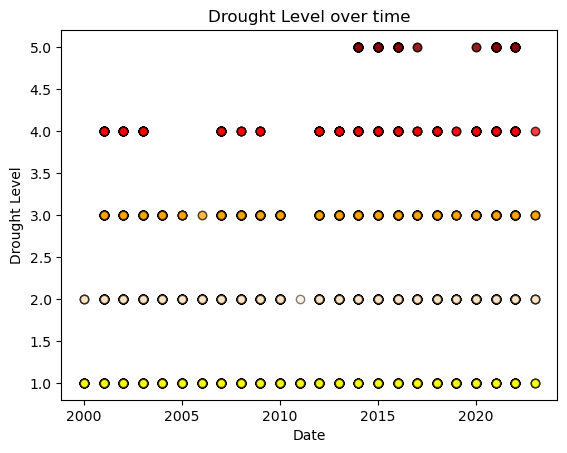

In [19]:
#same as above but with colored dots representing the drought levels

#How does drought levels change over time throughout CA?

x_values = cleaned_df["Map Year"]
y_values = cleaned_df["USDMLevelID"]

n=0
for i in droughtLVL:
    if i == 1:
        plt.scatter(x_values[n],y_values[n], color = "yellow", edgecolor="black", linewidth=1, marker="o", alpha=0.5)
    elif i == 2:
        plt.scatter(x_values[n],y_values[n], color = "bisque", edgecolor="black", linewidth=1, marker="o", alpha=0.5)
    elif i == 3:
        plt.scatter(x_values[n],y_values[n], color = "orange", edgecolor="black", linewidth=1, marker="o", alpha=0.5)
    elif i == 4:
        plt.scatter(x_values[n],y_values[n], color = "red", edgecolor="black", linewidth=1, marker="o", alpha=0.5)
    else:
        plt.scatter(x_values[n],y_values[n], color = "darkred", edgecolor="black", linewidth=1, marker="o", alpha=0.5)    
    n=n+1

plt.title("Drought Level over time")
plt.xlabel("Date")
plt.ylabel("Drought Level")

plt.show()

NameError: name 'color' is not defined

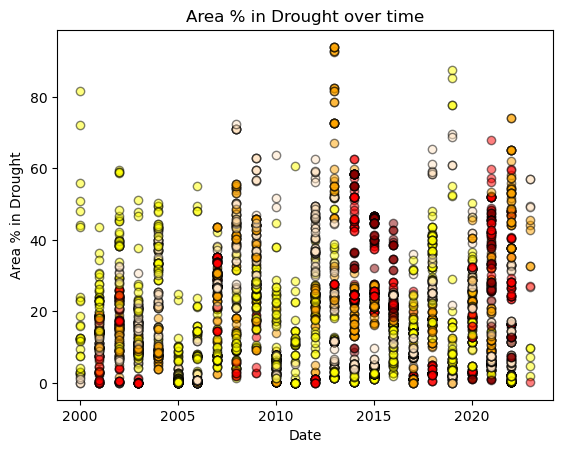

In [26]:
#Scatter plot of the %area experiencing drought over time, categorized using symboles to represent the levels of drought

# What % area of CA is experiencing drought levels and what are the drought levels?

x_values = cleaned_df["Map Year"]
y_values = cleaned_df["Area Current %"]
droughtLVL = cleaned_df["USDMLevelID"]

#plt.scatter(x_values, y_values, linewidth=1, marker="o", alpha=0.5)

droughtLVL = cleaned_df["USDMLevelID"]

n=0
for i in droughtLVL:
    if i == 1:
        plt.scatter(x_values[n],y_values[n], color = "yellow", edgecolor="black", linewidth=1, marker="o", alpha=0.5)
    elif i == 2:
        plt.scatter(x_values[n],y_values[n], color = "bisque", edgecolor="black", linewidth=1, marker="o", alpha=0.5)
    elif i == 3:
        plt.scatter(x_values[n],y_values[n], color = "orange", edgecolor="black", linewidth=1, marker="o", alpha=0.5)
    elif i == 4:
        plt.scatter(x_values[n],y_values[n], color = "red", edgecolor="black", linewidth=1, marker="o", alpha=0.5)
    else:
        plt.scatter(x_values[n],y_values[n], color = "darkred", edgecolor="black", linewidth=1, marker="o", alpha=0.5)    
    n=n+1

plt.title("Area % in Drought over time")
plt.xlabel("Date")
plt.ylabel("Area % in Drought")
plt.legend(i, color = color)

In [ ]:
##The graphs below were an attempt to display the data, but were unsuccessful.

Text(0, 0.5, 'Area % in Drought')

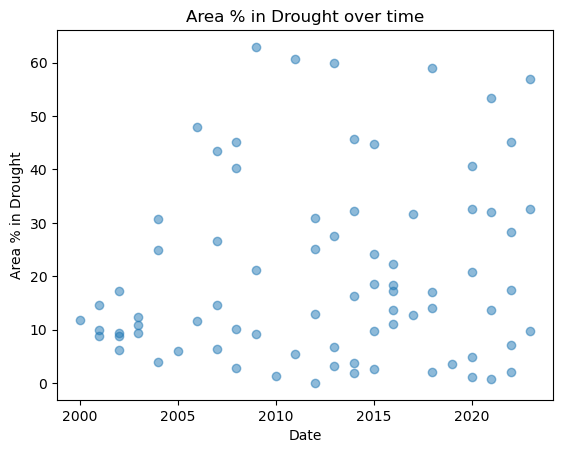

In [8]:
#graphed below is percent area of CA that is experiencing drought, with a data file that is looking at December points. What I should have done is figured out the average for the whole year, or average of each month, hten plotted that.
x_values = Year_cleaned_df["Map Year"]
y_values = Year_cleaned_df["Area Current %"]
droughtLVL = Year_cleaned_df["Drought Level"]

plt.scatter(x_values, y_values, linewidth=1, marker="o", alpha=0.5)
    

plt.title("Area % in Drought over time")
plt.xlabel("Date")
plt.ylabel("Area % in Drought")

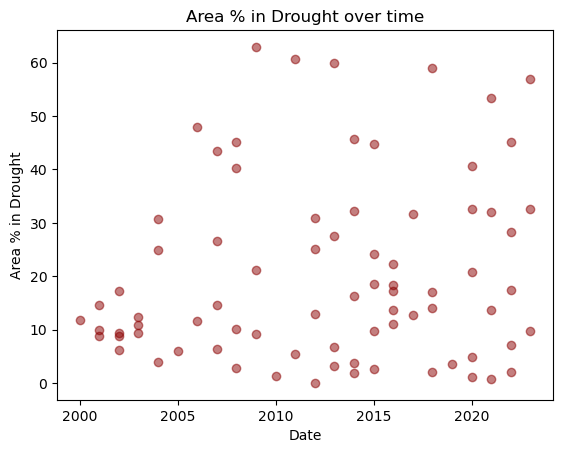

In [16]:
#Same information in this graph as above but color coded. 
x_values = Year_cleaned_df["Map Year"]
y_values = Year_cleaned_df["Area Current %"]
droughtLVL = Year_cleaned_df["Drought Level"]

n=0
for i in droughtLVL:
    if i == 1:
        plt.scatter(x_values[n],y_values[n], color = "white", edgecolor="black", linewidth=1, marker="o", alpha=0.5)
    elif i == 2:
        plt.scatter(x_values[n],y_values[n], color = "yellow", linewidth=1, marker="o", alpha=0.5)
    elif i == 3:
        plt.scatter(x_values[n],y_values[n], color = "bisque", linewidth=1, marker="o", alpha=0.5)
    elif i == 4:
        plt.scatter(x_values[n],y_values[n], color = "red",linewidth=1, marker="o", alpha=0.5)
    else:
        plt.scatter(x_values[n],y_values[n], color = "darkred", linewidth=1, marker="o", alpha=0.5)    
    n=n+1
        


plt.title("Area % in Drought over time")
plt.xlabel("Date")
plt.ylabel("Area % in Drought")

plt.show()

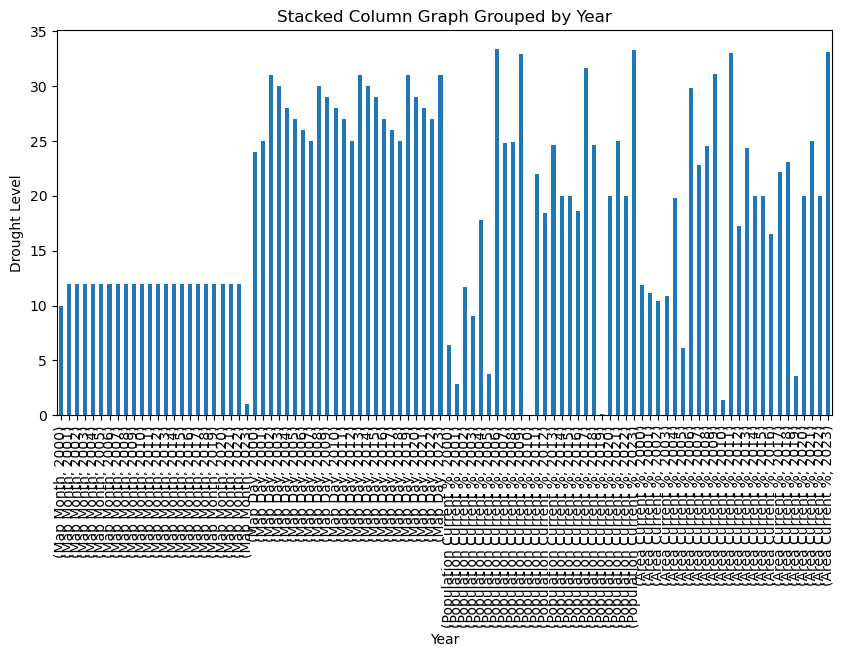

In [11]:
#attenpted to make a stacked column chart to show the levels of drought each year. It did not work.'

grouped = Year_cleaned_df.groupby(['Map Year']).mean()


# Plot the stacked column graph
grouped.unstack().plot(kind='bar', stacked=True, figsize=(10, 5))

plt.xlabel('Year')
plt.ylabel('Drought Level')
plt.title('Stacked Column Graph Grouped by Year')

plt.show()

#Area Current %
#USDMLevelID

#group the years for USDMLevelID

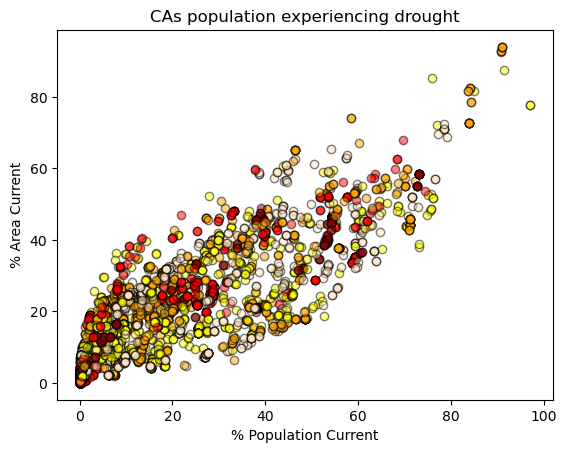

In [24]:
#Attempted to analize the % of the population that was experiencing drought levels
x_values = cleaned_df["Population Current %"]
y_values = cleaned_df["Area Current %"]

n=0
for i in droughtLVL:
    if i == 1:
        plt.scatter(x_values[n],y_values[n], color = "yellow", edgecolor="black", linewidth=1, marker="o", alpha=0.5)
    elif i == 2:
        plt.scatter(x_values[n],y_values[n], color = "bisque", edgecolor="black", linewidth=1, marker="o", alpha=0.5)
    elif i == 3:
        plt.scatter(x_values[n],y_values[n], color = "orange", edgecolor="black", linewidth=1, marker="o", alpha=0.5)
    elif i == 4:
        plt.scatter(x_values[n],y_values[n], color = "red", edgecolor="black", linewidth=1, marker="o", alpha=0.5)
    else:
        plt.scatter(x_values[n],y_values[n], color = "darkred", edgecolor="black", linewidth=1, marker="o", alpha=0.5)    
    n=n+1

#plt.title("Drought Level")
plt.xlabel("% Population Current")
plt.ylabel("% Area Current")
plt.title('CAs population experiencing drought')

plt.show()

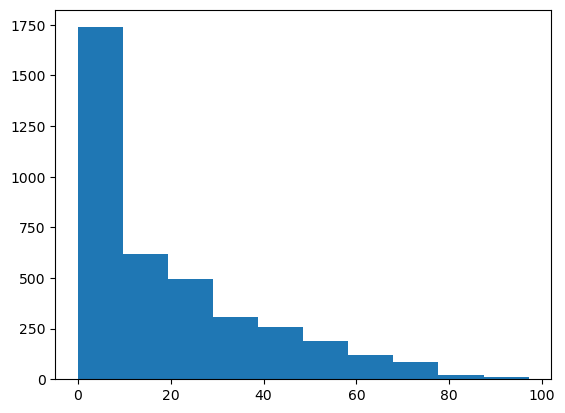

In [5]:
#Histogram

x = cleaned_df["Population Current %"]
plt.hist(x, bins=10)
plt.show()